# US prices and volumes match

In [1]:
import sys
sys.path.insert(0, '../../src')
#   https://realpython.com/python-modules-packages/
sys.path.append('../../src/d01_data')
sys.path.append('../../src/d02_processing')
sys.path.append('../../src/d03_modelling')

import extractions as extract
import transformations as transf
import training as train
import import_data as imp
import inference as inf

ctry = 'US'
crop = 'RASPBERRIES'
trade_ctry = 'MX'
ctgr = 'std'

In [2]:
df_prices = extract.get_prices(crop, ctry, trade_ctry, ctgr)
df_prices.set_index('Date_price',inplace=True)

In [3]:
df_prices.shape

(1722, 6)

In [4]:
df_prices.head(2)

,Product,Country,Trade_Country,Category,Campaign,Price
Date_price,,,,,,
2010-01-04,RASPBERRIES,US,MX,std,2009,15.747306
2010-01-05,RASPBERRIES,US,MX,std,2009,15.747306


In [5]:
df_volumes = extract.get_volumes(crop, ctry, trade_ctry)

In [6]:
df_volumes.shape

(1042, 1)

In [7]:
df_volumes.head(2)

,Volume
Date_volume,
2000-09-18,9071.8474
2000-09-25,0.0000


In [8]:
import datetime

df_volumes_prices = df_volumes.join(df_prices,how='outer')
df_volumes_prices.Volume.fillna(value=0, inplace=True)
df_volumes_prices.fillna(method='pad', inplace=True)

# First date with price
first_date = max(df_volumes_prices[(df_volumes_prices.Price).isnull()].index) + datetime.timedelta(days=1)

df_volumes_prices.drop(df_volumes_prices[df_volumes_prices.index < first_date].index, inplace=True)

In [9]:
df_volumes_prices.head()

,Volume,Product,Country,Trade_Country,Category,Campaign,Price
2010-01-04,235868.0324,RASPBERRIES,US,MX,std,2009.0,15.747306
2010-01-05,0.0000,RASPBERRIES,US,MX,std,2009.0,15.747306
2010-01-06,0.0000,RASPBERRIES,US,MX,std,2009.0,15.747306
2010-01-07,0.0000,RASPBERRIES,US,MX,std,2009.0,15.747306
2010-01-08,0.0000,RASPBERRIES,US,MX,std,2009.0,15.747306


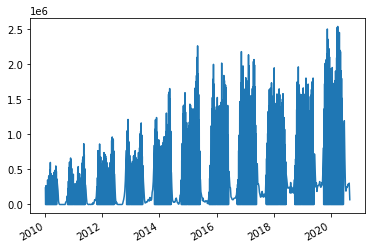

In [10]:
df_volumes_prices['Volume'].plot()

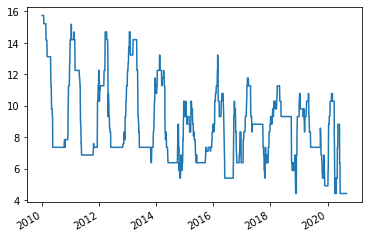

In [11]:
df_volumes_prices['Price'].plot()

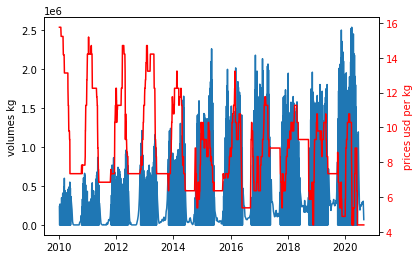

In [13]:
# http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/

import numpy as np
import matplotlib.pyplot as plt

x = df_volumes_prices.index
y1 = df_volumes_prices.Volume
y2 = df_volumes_prices.Price

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('volumes kg')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('prices usd per kg', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')